In [383]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
from scipy.stats import norm

import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm

In [384]:
pd.set_option('display.max_columns', None)

In [454]:
# Reading in data

train = pd.read_csv('train.csv',index_col=0)
test = pd.read_csv('test.csv',index_col=0)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [455]:
cat_features = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
               'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
               'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
               'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical',
               'KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
               'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
num_features = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
               'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
               'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',
               'Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'
               ]


/var/folders/v3/vbktqv9j0y702tbl5spn92b80000gn/T/ipykernel_63819/2388975033.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.SalePrice, kde = True, hist=True, fit = norm, ax = ax[1])


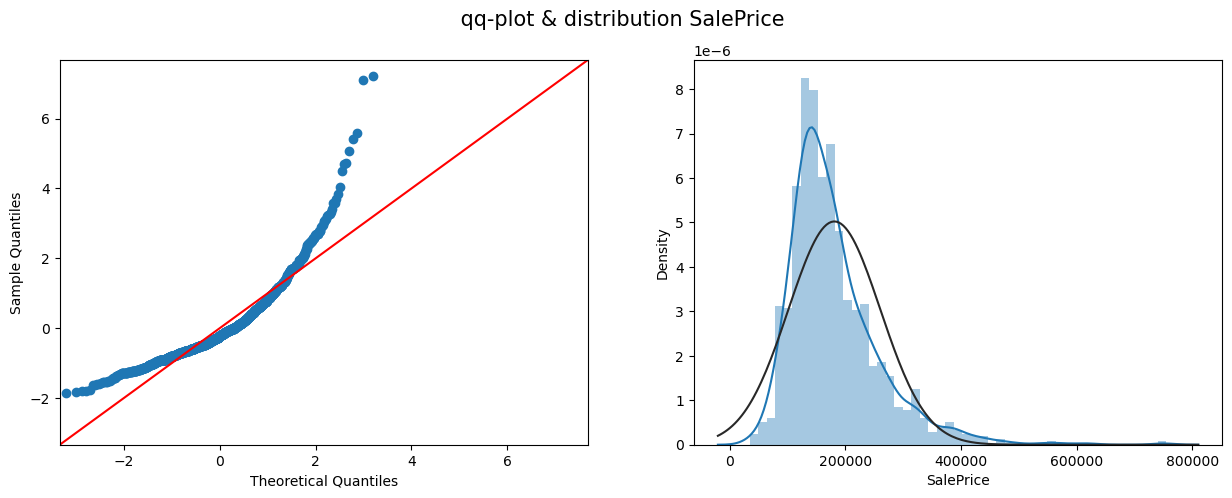

In [456]:
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(train.SalePrice, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(train.SalePrice, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

/var/folders/v3/vbktqv9j0y702tbl5spn92b80000gn/T/ipykernel_63819/288429208.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])


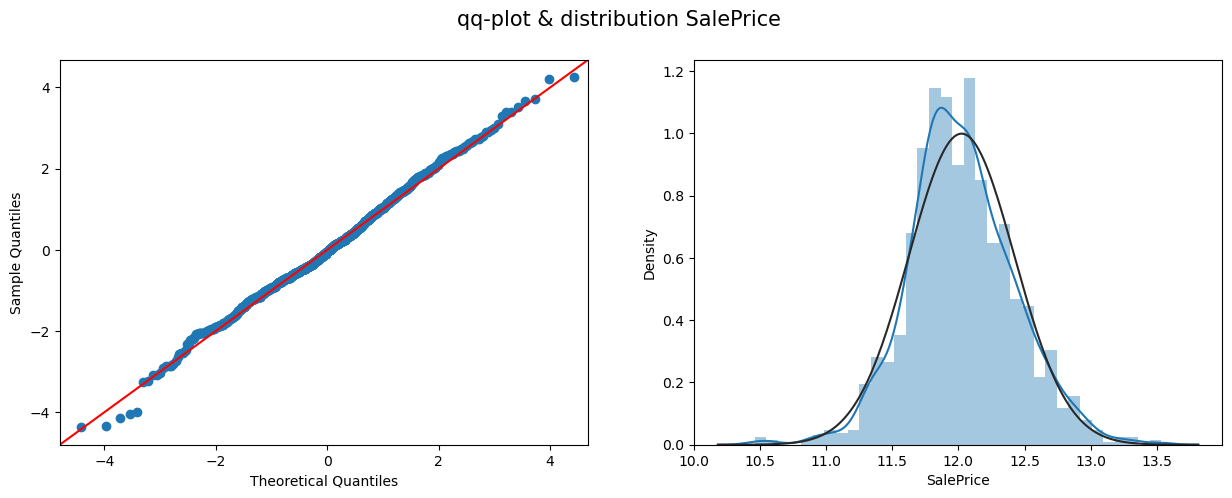

In [457]:
# SalePrice after log transformation

target_log = np.log1p(train.SalePrice)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

## Looking at Nulls

In [475]:
# Making a list, since there are a lot of columns that aren't visible otherwise
list(zip(train.isna().sum().index,train.isna().sum().values))

[('MSSubClass', 0),
 ('MSZoning', 0),
 ('LotFrontage', 259),
 ('LotArea', 0),
 ('Street', 0),
 ('Alley', 1369),
 ('LotShape', 0),
 ('LandContour', 0),
 ('Utilities', 0),
 ('LotConfig', 0),
 ('LandSlope', 0),
 ('Neighborhood', 0),
 ('Condition1', 0),
 ('Condition2', 0),
 ('BldgType', 0),
 ('HouseStyle', 0),
 ('OverallQual', 0),
 ('OverallCond', 0),
 ('YearBuilt', 0),
 ('YearRemodAdd', 0),
 ('RoofStyle', 0),
 ('RoofMatl', 0),
 ('Exterior1st', 0),
 ('Exterior2nd', 0),
 ('MasVnrType', 8),
 ('MasVnrArea', 8),
 ('ExterQual', 0),
 ('ExterCond', 0),
 ('Foundation', 0),
 ('BsmtQual', 37),
 ('BsmtCond', 37),
 ('BsmtExposure', 38),
 ('BsmtFinType1', 37),
 ('BsmtFinSF1', 0),
 ('BsmtFinType2', 38),
 ('BsmtFinSF2', 0),
 ('BsmtUnfSF', 0),
 ('TotalBsmtSF', 0),
 ('Heating', 0),
 ('HeatingQC', 0),
 ('CentralAir', 0),
 ('Electrical', 1),
 ('1stFlrSF', 0),
 ('2ndFlrSF', 0),
 ('LowQualFinSF', 0),
 ('GrLivArea', 0),
 ('BsmtFullBath', 0),
 ('BsmtHalfBath', 0),
 ('FullBath', 0),
 ('HalfBath', 0),
 ('BedroomAb

In [396]:
# Some basic fillling
train.Alley.fillna('None',inplace=True)
test.Alley.fillna('None',inplace=True)

train.FireplaceQu.fillna('None',inplace=True)
test.FireplaceQu.fillna('None',inplace=True)

train.PoolQC.fillna('None',inplace=True)
test.PoolQC.fillna('None',inplace=True)

train.Fence.fillna('None',inplace=True)
test.Fence.fillna('None',inplace=True)

# Should maybe drop MiscFeature due to mostly null, but should get dropped in feature selection
train.MiscFeature.fillna('None',inplace=True)
test.MiscFeature.fillna('None',inplace=True)

train.GarageType.fillna('None',inplace=True)
test.GarageType.fillna('None',inplace=True)

train.GarageYrBlt.fillna(0,inplace=True)
test.GarageYrBlt.fillna(0,inplace=True)

train.GarageFinish.fillna('None',inplace=True)
test.GarageFinish.fillna('None',inplace=True)

train.GarageQual.fillna('None',inplace=True)
test.GarageQual.fillna('None',inplace=True)

train.GarageCond.fillna('None',inplace=True)
test.GarageCond.fillna('None',inplace=True)

train.BsmtQual.fillna('None',inplace=True)
test.BsmtQual.fillna('None',inplace=True)

train.BsmtCond.fillna('None',inplace=True)
test.BsmtCond.fillna('None',inplace=True)

train.BsmtExposure.fillna('None',inplace=True)
test.BsmtExposure.fillna('None',inplace=True)

train.BsmtFinType1.fillna('None',inplace=True)
test.BsmtFinType1.fillna('None',inplace=True)

train.BsmtFinType2.fillna('None',inplace=True)
test.BsmtFinType2.fillna('None',inplace=True)

train.MasVnrType.fillna('None',inplace=True)
test.MasVnrType.fillna('None',inplace=True)

train.MasVnrArea.fillna(0,inplace=True)
test.MasVnrArea.fillna(0,inplace=True)


In [399]:
train.Electrical.unique()

array([4., 1., 3., 0., 2.])

In [398]:
# Mapped values based on average sale price
train.MSSubClass = train.MSSubClass.map(mean_saleprice_map(train,'MSSubClass'))

# Mapped values based on average sale price
train.MSZoning = train.MSZoning.map(mean_saleprice_map(train,'MSZoning'))

train.Street = train.Street.map({'Pave':1,'Grvl':0})

train.Alley = train.Alley.map({'None':0,'Grvl':1,'Pave':2})

train.LotShape = train.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})

train.LandContour = train.LandContour.map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})

train.Utilities = train.Utilities.map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})

# Mapped values based on average sale price
train.LotConfig = train.LotConfig.map(mean_saleprice_map(train,'LotConfig'))

train.LandSlope = train.LandSlope.map({'Sev':0,'Mod':1,'Gtl':2})

# Condition1 and Condition2 need to be combined as One Hot Encoded
train = comb_encoded_columns(train,'Condition1','Condition2')

train.BldgType = train.BldgType.map({'Twnhs':0,'TwnhsI':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})

train.HouseStyle = train.HouseStyle.map({'1Story':0,'1.5Unf':1,'1.5Fin':2,'SFoyer':3,'SLvl':3,'2Story':4,\
                                       '2.5Unf':5,'2.5Fin':6})

# RoofStyle One Hot Encoded
train = pd.get_dummies(data=train,columns=['RoofStyle'])

train.RoofMatl = train.RoofMatl.map(mean_saleprice_map(train,'RoofMatl'))

# Exterior1st and Exterior2nd need to be combined as One Hot Encoded
train = comb_encoded_columns(train,'Exterior1st','Exterior2nd')

# MasVnrType One Hot Encoded
train.MasVnrType = train.MasVnrType.map({'None':0,'BrkCmn':1,'BrkFace':2,'Stone':3})

train.ExterQual = train.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train.ExterCond = train.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train.Foundation = train.Foundation.map(mean_saleprice_map(train,'Foundation'))

train.BsmtQual = train.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train.BsmtCond = train.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train.BsmtExposure = train.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})

train.BsmtFinType1 = train.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

train.BsmtFinType2 = train.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

# Mapped values based on average sale price
train.Heating = train.Heating.map(mean_saleprice_map(train,'Heating'))

train.HeatingQC = train.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train.CentralAir = train.CentralAir.map({'N':0,'Y':1})

train.Electrical = train.Electrical.map({'FuseP':0,'FuseF':1,'Mixed':2,'FuseA':3,'SBrkr':4})
train.Electrical.fillna(2,inplace=True) # Filling one missing value with average

train.KitchenQual = train.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train.Functional = train.Functional.map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})

train.FireplaceQu = train.FireplaceQu.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train.GarageType = train.GarageType.map({'None':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,
                                        '2Types':6})

train.GarageFinish = train.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})

train.GarageQual = train.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train.GarageCond = train.GarageCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

train.PavedDrive = train.PavedDrive.map({'N':0,'P':1,'Y':2})

train.PoolQC = train.PoolQC.map({'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

train.Fence = train.Fence.map({'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

# MiscFeature pretty low, so exclude or one hot encode
train = pd.get_dummies(data=train,columns=['MiscFeature'])

# MiscVal probably drop

# SaleType one hot encode
train = pd.get_dummies(data=train,columns=['SaleType'])

# SaleCondition one hot encode
train = pd.get_dummies(data=train,columns=['SaleCondition'])

<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

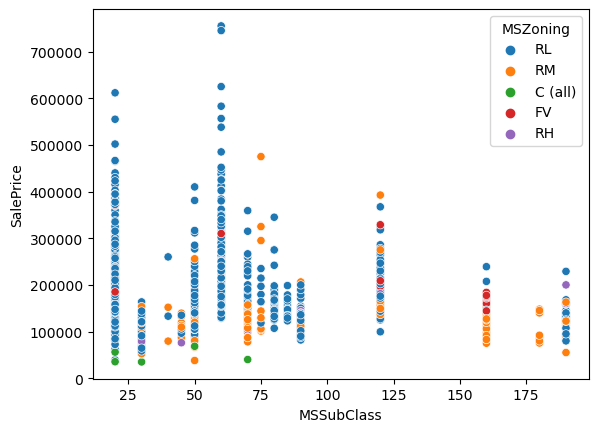

In [85]:
# MSZoning and MSSubClass

sns.scatterplot(data=train,x='MSSubClass',y='SalePrice',hue='MSZoning')

In [299]:
train.groupby('Foundation').agg({'SalePrice':'mean'}).sort_values(by='SalePrice')

,SalePrice
Foundation,
Slab,107365.625000
BrkTil,132291.075342
CBlock,149805.714511
Stone,165959.166667
Wood,185666.666667
PConc,225230.442040


In [109]:
def mean_saleprice_map(df,column):
    
    mapping_dict = dict(zip([i for i in df.groupby(column).agg({'SalePrice':'mean'}).sort_values(by='SalePrice').index],

    list(range(len([i for i in df.groupby(column).agg({'SalePrice':'mean'}).sort_values(by='SalePrice').index])))
         
        ))
    
    return mapping_dict
    
mean_saleprice_map(train,'MSSubClass')

{30: 0,
 180: 1,
 45: 2,
 190: 3,
 90: 4,
 160: 5,
 50: 6,
 85: 7,
 40: 8,
 70: 9,
 80: 10,
 20: 11,
 75: 12,
 120: 13,
 60: 14}

In [199]:
def comb_encoded_columns(df,column1,column2):
    
    encoded_df = pd.get_dummies(df[column1]).add(pd.get_dummies(df[column2]),fill_value=0).replace({2:1})
    
    return df.join(pd.get_dummies(df[column1]).add(pd.get_dummies(df[column2]),fill_value=0)\
           .replace({2:1})).drop([column1,column2],axis=1)

In [348]:
train.dropna().drop('Neighborhood',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,Artery,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,AsbShng,AsphShn,Brk Cmn,BrkComm,BrkFace,CBlock,CemntBd,CmentBd,HdBoard,ImStucc,MetalSd,Other,Plywood,Stone,Stucco,VinylSd,Wd Sdng,Wd Shng,WdShing,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,14,3,65.0,8450,1.0,0,3,3,3,0,2,4,4,7,5,2003,2003,2,2,196.0,3,2,5,4,3,1,6,706,1,0,150,856,5,4,1,4.0,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,5,2003.0,2,2,548,3,3,2,0,61,0,0,0,0,0,0,0,2,2008,208500,0,0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,11,3,80.0,9600,1.0,0,3,3,3,1,2,4,0,6,8,1976,1976,2,0,0.0,2,2,2,4,3,4,5,978,1,0,284,1262,5,4,1,4.0,1262,0,0,1262,0,1,2,0,3,1,2,6,7,1,3,5,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,0,0,5,2007,181500,0,1,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1,0.0,0,0,0,0,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,14,3,68.0,11250,1.0,0,2,3,3,0,2,4,4,7,5,2001,2002,2,2,162.0,3,2,5,4,3,2,6,486,1,0,434,920,5,4,1,4.0,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,3,5,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,0,0,9,2008,223500,0,0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,9,3,60.0,9550,1.0,0,2,3,3,2,2,4,4,7,5,1915,1970,2,0,0.0,2,2,1,3,4,1,5,216,1,0,540,756,5,3,1,4.0,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,4,1,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,0,0,2,2006,140000,0,0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,14,3,84.0,14260,1.0,0,2,3,3,1,2,4,4,8,5,2000,2000,2,2,350.0,3,2,5,4,3,3,6,655,1,0,490,1145,5,4,1,4.0,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,3,5,2000.0,2,3,836,3,3,2,192,84,0,0,0,0,0,0,0,12,2008,250000,0,0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,14,3,62.0,7917,1.0,0,3,3,3,0,2,4,4,6,5,1999,2000,2,0,0.0,2,2,5,4,3,1,1,0,1,0,953,953,5,4,1,4.0,953,694,0,1647,0,0,2,1,3,1,2,7,7,1,3,5,1999.0,2,2,460,3,3,2,0,40,0,0,0,0,0,0,0,8,2007,175000,0,0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,0,0.0,0,0,0,1,0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,11,3,85.0,13175,1.0,0,3,3,3,0,2,4,0,6,6,1978,1988,2,3,119.0,2,2,2,4,3,1,5,7

In [401]:
## Since LotFrontage can be determined by multiple other factors, using KNN Imputer to finish filling values
from sklearn.neighbors import KNeighborsRegressor

train_no_nans = train.dropna().drop('Neighborhood',axis=1)

model = KNeighborsRegressor(n_neighbors=5)

knr = model.fit(train_no_nans.drop(['LotFrontage','SalePrice'],axis=1), train_no_nans.LotFrontage)

knn_preds = knr.predict(train[train.LotFrontage.isna()].drop(['LotFrontage','SalePrice','Neighborhood'],axis=1))

train.iloc[train[train.LotFrontage.isna()].index-1,2] = knn_preds

In [359]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [413]:
knn_preds = knr.predict(train[train.LotFrontage.isna()].drop(['LotFrontage','SalePrice','Neighborhood'],axis=1))

knn_preds

array([ 86.8,  79. ,  76. ,  72.2,  73.2,  71.4,  65.4,  75.4,  68.6,
        75.4,  81. ,  59.8,  64.4,  73.6,  77.8,  61.8,  69.8,  63.4,
        88.2, 103.2,  45.4,  77. ,  61.6,  77.6,  73. ,  50.6,  81.6,
        63.4,  83.4,  74. ,  80. ,  84. ,  83. ,  26.4,  68.4,  68.4,
        37.6,  79.6,  83.2,  68.4,  86.8,  68.2,  68.2,  70.8,  71.8,
       128. ,  68.8,  57.6,  80. ,  77.4,  64. ,  65.6,  70.2, 107.6,
        74. ,  74. , 128. ,  64.2,  73.2,  94.2,  37.8,  75.2,  63.4,
        66. , 103.4,  76. ,  73.2,  62.8,  61. ,  74.4,  64.2,  55.6,
        69.8,  78. ,  35.8, 102.6,  77.2,  80.8,  69.4, 111. ,  55. ,
        61.4,  43. ,  68.8,  63.6,  28.2,  95. ,  82.6,  73. , 144.4,
        79. ,  90.4,  78. ,  73. ,  88.8,  43. ,  93.2, 102. ,  60. ,
        85.6,  37.6,  83.2,  87.2,  81.8,  70.4,  25.8,  69.4,  68. ,
        68.6,  76. , 111. ,  91.2,  83. ,  67.4,  35.4,  54.8,  58.2,
        37.6, 108.4,  60.2,  74.8,  47. ,  37.6,  93.4,  61.6,  77. ,
        70.2,  61.4,

In [ ]:
# Some basic fillling
def basic_filling(df):

    df.Alley.fillna('None',inplace=True)
    
    df.FireplaceQu.fillna('None',inplace=True)

    df.PoolQC.fillna('None',inplace=True)

    df.Fence.fillna('None',inplace=True)

    # Should maybe drop MiscFeature due to mostly null, but should get dropped in feature selection
    df.MiscFeature.fillna('None',inplace=True)

    df.GarageType.fillna('None',inplace=True)
    
    df.GarageYrBlt.fillna(0,inplace=True)

    df.GarageFinish.fillna('None',inplace=True)

    df.GarageQual.fillna('None',inplace=True)

    df.GarageCond.fillna('None',inplace=True)

    df.BsmtQual.fillna('None',inplace=True)

    df.BsmtCond.fillna('None',inplace=True)

    df.BsmtExposure.fillna('None',inplace=True)

    df.BsmtFinType1.fillna('None',inplace=True)

    df.BsmtFinType2.fillna('None',inplace=True)

    df.MasVnrType.fillna('None',inplace=True)

    df.MasVnrArea.fillna(0,inplace=True)
    
    return df


In [476]:
def mapped_values(df):

    # Mapped values based on average sale price
#     df.MSSubClass = df.MSSubClass.map(mean_saleprice_map(df,'MSSubClass'))

    # Mapping with mode, as we do not have salesprice in test, and missing values arent many
    df['MSSubClass'] = df['MSSubClass'].fillna(df.MSSubClass.mode().values[0])

    # Mapped values based on average sale price
#     df.MSZoning = df.MSZoning.map(mean_saleprice_map(df,'MSZoning'))
    
    # Mapping with mode, as we do not have salesprice in test, and missing values arent many
    df['MSZoning'] = df['MSZoning'].fillna(df.MSZoning.mode().values[0])

    df.Street = df.Street.map({'Pave':1,'Grvl':0})

    df.Alley = df.Alley.map({'None':0,'Grvl':1,'Pave':2})

    df.LotShape = df.LotShape.map({'IR3':0,'IR2':1,'IR1':2,'Reg':3})

    df.LandContour = df.LandContour.map({'Low':0,'HLS':1,'Bnk':2,'Lvl':3})

    df.Utilities = df.Utilities.map({'ELO':0,'NoSeWa':1,'NoSewr':2,'AllPub':3})

    # Mapped values based on average sale price - Shouldn't have nulls
#     df.LotConfig = df.LotConfig.map(mean_saleprice_map(df,'LotConfig'))

    df.LandSlope = df.LandSlope.map({'Sev':0,'Mod':1,'Gtl':2})

    # Condition1 and Condition2 need to be combined as One Hot Encoded
    df = comb_encoded_columns(df,'Condition1','Condition2')

    df.BldgType = df.BldgType.map({'Twnhs':0,'TwnhsI':0,'TwnhsE':1,'Duplex':2,'2fmCon':3,'1Fam':4})

    df.HouseStyle = df.HouseStyle.map({'1Story':0,'1.5Unf':1,'1.5Fin':2,'SFoyer':3,'SLvl':3,'2Story':4,\
                                           '2.5Unf':5,'2.5Fin':6})

    # RoofStyle One Hot Encoded
    df = pd.get_dummies(data=df,columns=['RoofStyle'])

#     df.RoofMatl = df.RoofMatl.map(mean_saleprice_map(df,'RoofMatl'))
    # Mapping with mode, as we do not have salesprice in test, and missing values arent many
    df['RoofMatl'] = df['RoofMatl'].fillna(df.RoofMatl.mode().values[0])

    # Exterior1st and Exterior2nd need to be combined as One Hot Encoded
    df = comb_encoded_columns(df,'Exterior1st','Exterior2nd')

    # MasVnrType One Hot Encoded
    df.MasVnrType = df.MasVnrType.map({'None':0,'BrkCmn':1,'BrkFace':2,'Stone':3})

    df.ExterQual = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

    df.ExterCond = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

    # Mapped values based on average sale price
#     df.Foundation = df.Foundation.map(mean_saleprice_map(df,'Foundation'))
    # Mapping with mode, as we do not have salesprice in test, and missing values arent many
    df['Foundation'] = df['Foundation'].fillna(df.Foundation.mode().values[0])

    df.BsmtQual = df.BsmtQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

    df.BsmtCond = df.BsmtCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

    df.BsmtExposure = df.BsmtExposure.map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})

    df.BsmtFinType1 = df.BsmtFinType1.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

    df.BsmtFinType2 = df.BsmtFinType2.map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

    # Mapped values based on average sale price
#     df.Heating = df.Heating.map(mean_saleprice_map(df,'Heating'))
    # Maping with mode, as we do not have salesprice in test, and missing values arent many
    df['Heating'] = df['Heating'].fillna(df.Heating.mode().values[0])

    df.HeatingQC = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

    df.CentralAir = df.CentralAir.map({'N':0,'Y':1})

    df.Electrical = df.Electrical.map({'FuseP':0,'FuseF':1,'Mixed':2,'FuseA':3,'SBrkr':4})
    df.Electrical.fillna(2,inplace=True) # Filling one missing value with average

    df.KitchenQual = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

    df.Functional = df.Functional.map({'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7})

    df.FireplaceQu = df.FireplaceQu.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

    df.GarageType = df.GarageType.map({'None':0,'Detchd':1,'CarPort':2,'BuiltIn':3,'Basment':4,'Attchd':5,
                                            '2Types':6})

    df.GarageFinish = df.GarageFinish.map({'None':0,'Unf':1,'RFn':2,'Fin':3})

    df.GarageQual = df.GarageQual.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

    df.GarageCond = df.GarageCond.map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

    df.PavedDrive = df.PavedDrive.map({'N':0,'P':1,'Y':2})

    df.PoolQC = df.PoolQC.map({'None':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})

    df.Fence = df.Fence.map({'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

    # MiscFeature pretty low, so exclude or one hot encode
    df = pd.get_dummies(data=df,columns=['MiscFeature'])

    # MiscVal probably drop

    # SaleType one hot encode
    df = pd.get_dummies(data=df,columns=['SaleType'])

    # SaleCondition one hot encode
    df = pd.get_dummies(data=df,columns=['SaleCondition'])
    
    return df

In [486]:
## Since LotFrontage can be determined by multiple other factors, using KNN Imputer to finish filling values
from sklearn.neighbors import KNeighborsRegressor

def impute_lot_frontage(df,df_type):
    df_no_nans = df.dropna().drop('Neighborhood',axis=1)

    model = KNeighborsRegressor(n_neighbors=5)
    
    if df_type == 'train':
        drop_cols = ['LotFrontage','SalePrice']
    else:
        drop_cols = ['LotFrontage']

    knr = model.fit(df_no_nans.drop(drop_cols,axis=1), df_no_nans.LotFrontage)

    knn_preds = knr.predict(df[df.LotFrontage.isna()].drop(drop_cols.append('Neighborhood'),axis=1))

    df.iloc[df[df.LotFrontage.isna()].index-1,2] = knn_preds
    
    return df